In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    accuracy_score,
)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


### KNN for Regression

In [ ]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

print(diabetes_X.shape)
print(diabetes_y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.2, random_state=42
)

print("----- Before scale -----")
print(X_train.shape)
print(X_test.shape)

----- Before scale -----
(353, 10)
(89, 10)


In [ ]:
# Scale the features using StandardScaler (Chuẩn hóa dữ liệu)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("----- After scale -----")
print(X_train.shape)
print(X_test.shape)

----- After scale -----
(353, 10)
(89, 10)


In [11]:
# Training
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Testing
y_pred = knn_regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

3047.449887640449

In [ ]:
k_values = [i for i in range(1, 31)]
scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(np.mean(score))

print(scores)

[np.float64(0.06775630941323418), np.float64(0.30937067067047985), np.float64(0.37958978494939666), np.float64(0.3834728582760696), np.float64(0.42480887066066253), np.float64(0.45427403959873547), np.float64(0.4395170478232978), np.float64(0.4411806017562513), np.float64(0.4203699249844848), np.float64(0.40198893478775766), np.float64(0.4151365814814675), np.float64(0.42006053552060396), np.float64(0.4137121234729817), np.float64(0.41509584486293427), np.float64(0.4236153420622729), np.float64(0.4216524543865595), np.float64(0.43839604653908204), np.float64(0.4228247890228536), np.float64(0.4318095298925808), np.float64(0.4246298915615395), np.float64(0.42189247898742044), np.float64(0.4307588987512413), np.float64(0.4257166524439113), np.float64(0.42808137240338184), np.float64(0.435365652792002), np.float64(0.4347840776266588), np.float64(0.43474423439652543), np.float64(0.4277027931280475), np.float64(0.41907067327625136), np.float64(0.4128032588779337)]


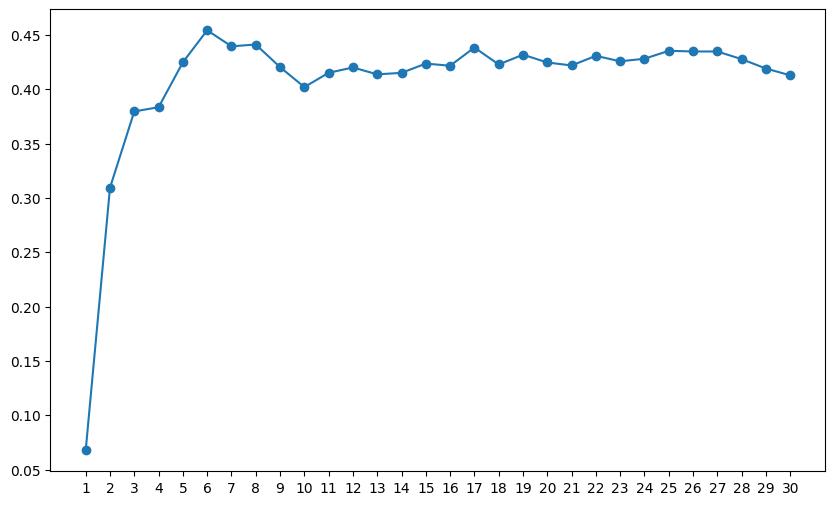

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker="o")
plt.xticks(k_values)
plt.show()

### Bộ dữ liệu Iris

In [44]:
# Load Iris dataset
iris_X, iris_y = load_iris(return_X_y=True)

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=42
)

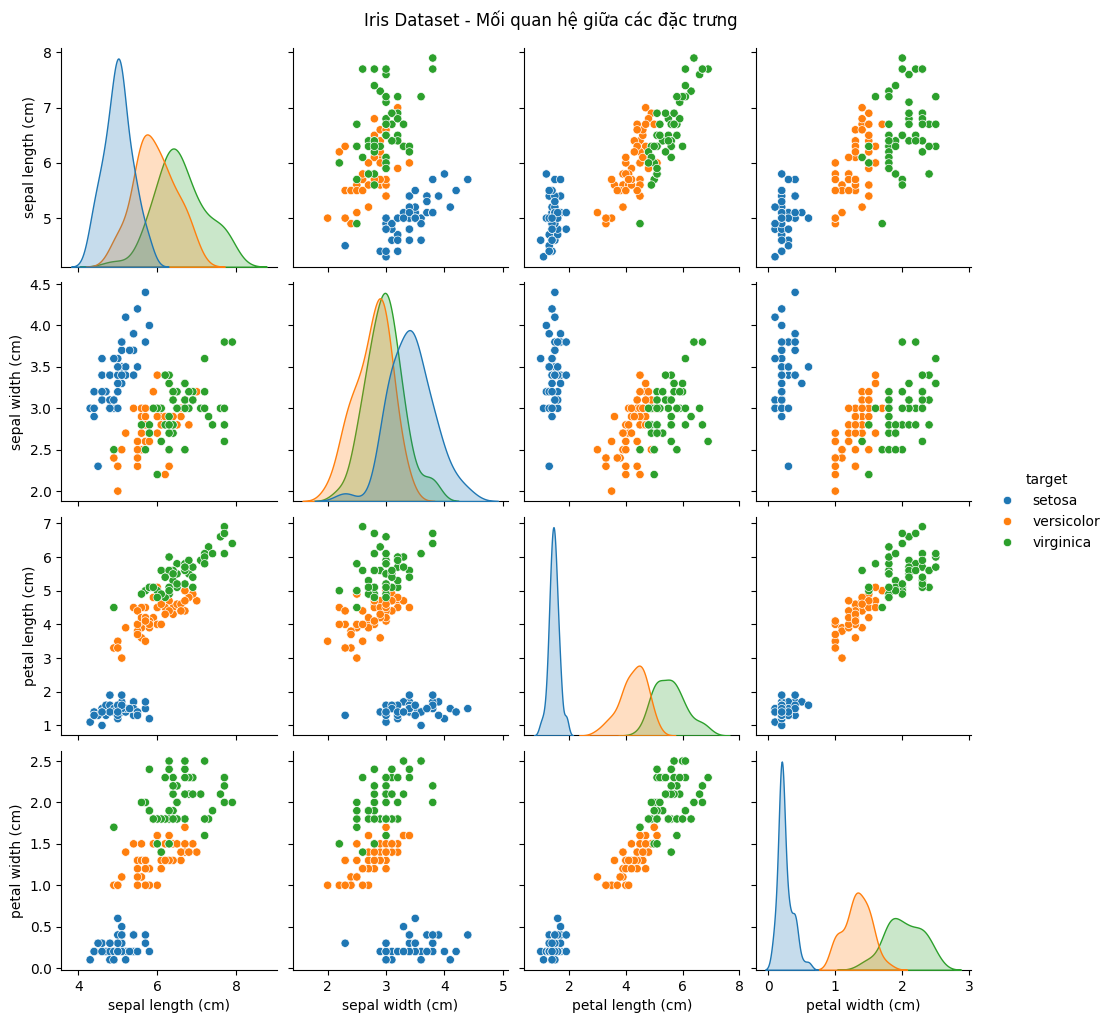

In [45]:
import seaborn as sns

# Load iris dataset
iris = load_iris()

# Chuyển thành DataFrame để dễ trực quan
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target"] = df["target"].map({i: name for i, name in enumerate(iris.target_names)})

# Vẽ biểu đồ pairplot
sns.pairplot(df, hue="target")
plt.suptitle("Iris Dataset - Mối quan hệ giữa các đặc trưng", y=1.02)
plt.show()


In [46]:
# Scale the features using StandardScaler
scaler = StandardScaler()
iris_X_train = scaler.fit_transform(iris_X_train)
iris_X_test = scaler.transform(iris_X_test)

# Train and Predict
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(iris_X_train, iris_y_train)

iris_y_predict = knn_classifier.predict(iris_X_test)
accuracy = accuracy_score(iris_y_test, iris_y_predict)
print(accuracy)

1.0


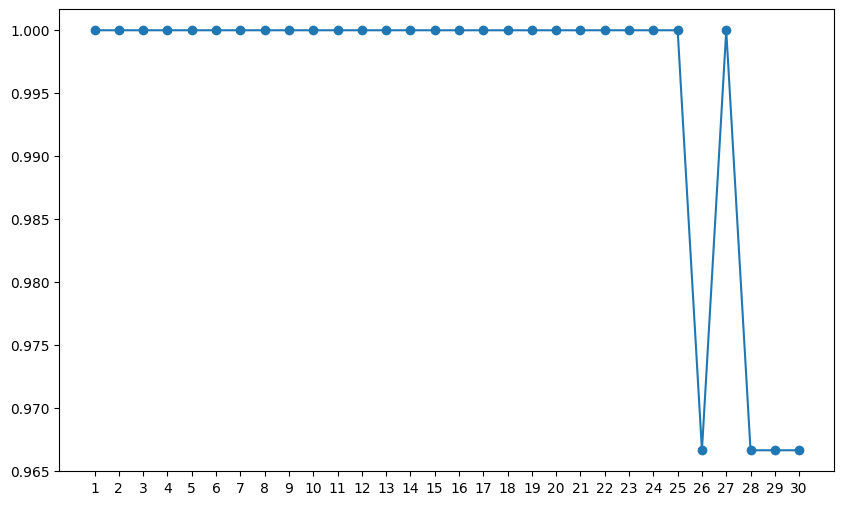

In [49]:
k_values = [i for i in range(1, 31)]
scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(iris_X_train, iris_y_train)
    y_pred = knn_classifier.predict(iris_X_test)
    score = accuracy_score(iris_y_test, y_pred)
    scores.append(np.mean(score))

plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker="o")
plt.xticks(k_values)
plt.show()

### KNN for IMDB Classification

In [ ]:
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb["train"], imdb["test"]

len(imdb_train["text"]), len(imdb_test["text"])

(25000, 25000)

In [62]:
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train["text"])
X_test = vectorizer.transform(imdb_test["text"])

y_train = np.array(imdb_train["label"])
y_test = np.array(imdb_test["label"])

# Scaler the features using StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predict
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.63428, 0.6636005739725523)

### Bài tập tính toán và code

In [65]:
import numpy as np

data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

# Khởi tạo Centroids
centroid1 = np.array([2.0, 3.0, 1.5])
centroid2 = np.array([1.0, 2.0, 1.0])

# Phân cụm
cluster1 = []
for point in data:
    d1 = np.linalg.norm(point - centroid1)
    d2 = np.linalg.norm(point - centroid2)

    if d1 < d2:
        cluster1.append(point)

cluster1 = np.array(cluster1)
print(cluster1)

new_centroid = cluster1.mean(axis=0)
print("Centroid mới của Cụm 1:", new_centroid)


[[2.  3.  1.5]
 [3.  3.5 2. ]
 [3.5 3.  2.5]
 [8.  8.  7.5]
 [8.5 8.5 8. ]
 [9.  8.  8.5]
 [1.5 2.5 1.5]]
Centroid mới của Cụm 1: [5.07142857 5.21428571 4.5       ]
